# Graficos

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

##Base de Dados

In [2]:
dataset = pd.read_csv('census.csv')
dataset.head()

,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


##Grafico de dispersão

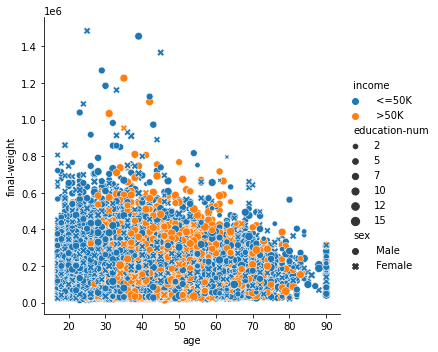

In [3]:
sns.relplot(x = 'age', y = 'final-weight', data=dataset,
            hue ='income', style = 'sex',
            size = 'education-num'); # hue vai indicar um agrupamento
                                     # Style vai mudar o estilo dos dados plotados no grafico (x = female, O = male)
                                     # Size vai aumentar o tamanho da bolinha de acordo com o nivél de estudo

## Grafico de barra e setor(pizza)

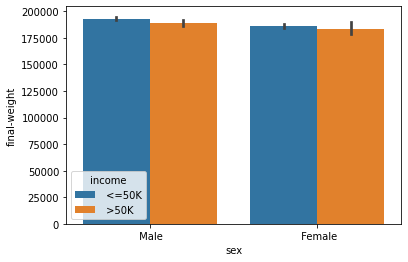

In [4]:
sns.barplot(x = 'sex', y ='final-weight', data=dataset,
            hue = 'income');

Para gerarmos um grafico de setor(pizza) precisamos agrupar os dados na qual queremos plotar.

In [5]:
dados_agrupados = dataset.groupby(['income'])['education-num'].sum()
dados_agrupados

income
 <=50K    237190
 >50K      91047
Name: education-num, dtype: int64

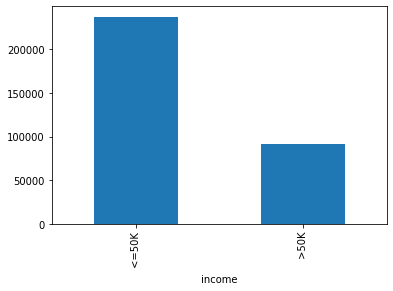

In [6]:
dados_agrupados.plot.bar();

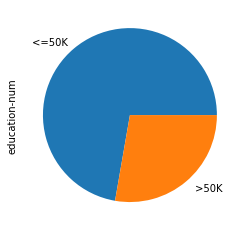

In [7]:
dados_agrupados.plot.pie();

##Grafico de linhas
* A melhor aplicação deste grafico é para dados que tenham valores no decorrer do tempo

In [8]:
vendas = {'Mês': np.array([1,2,3,4,5,6,7,8,9,10,11,12,]),
           'Valor': np.array([100,200,120,300,500,198,200,209,130,500,300,120])}

In [9]:
vendas_df = pd.DataFrame(vendas)
vendas_df

,Mês,Valor
0,1,100
1,2,200
2,3,120
3,4,300
4,5,500
5,6,198
6,7,200
7,8,209
8,9,130
9,10,500


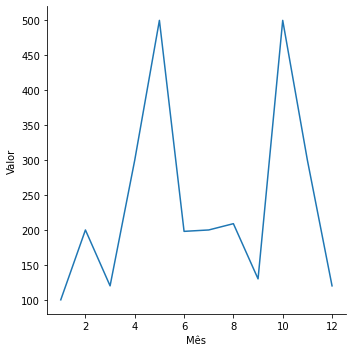

In [10]:
 sns.relplot(x = 'Mês', y = 'Valor', kind='line', data=vendas_df);

##Grafico BoxPlot

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


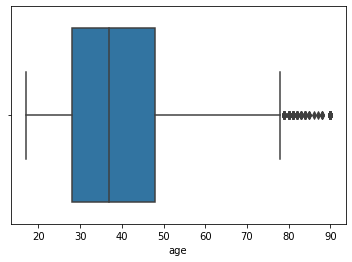

In [11]:
sns.boxplot(dataset['age']);

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


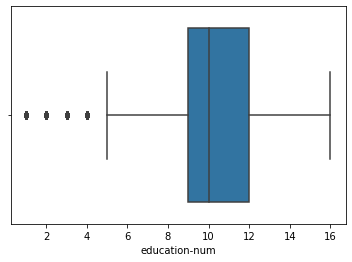

In [12]:
sns.boxplot(dataset['education-num']);

In [13]:
dataset2 = dataset.iloc[:, [0,4,12]]
dataset2.head()

,age,education-num,hour-per-week
0,39,13,40
1,50,13,13
2,38,9,40
3,53,7,40
4,28,13,40


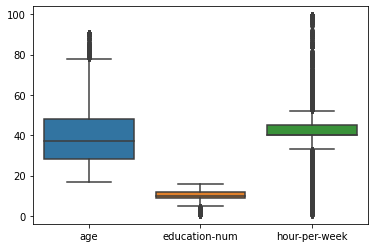

In [14]:
sns.boxplot(data=dataset2,);

##Grafico com atributos categóricos

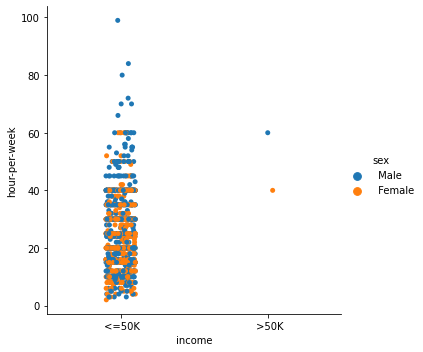

In [15]:
sns.catplot(x = 'income', y = 'hour-per-week', 
            data = dataset.query('age < 20'), hue = 'sex', );

##Subgráficos

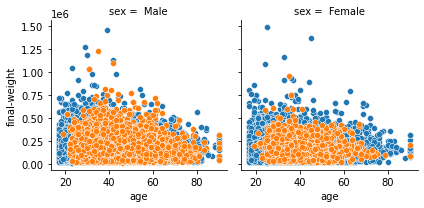

In [16]:
 g = sns.FacetGrid(dataset, col = 'sex', hue = 'income')
 g.map(sns.scatterplot,'age', 'final-weight');

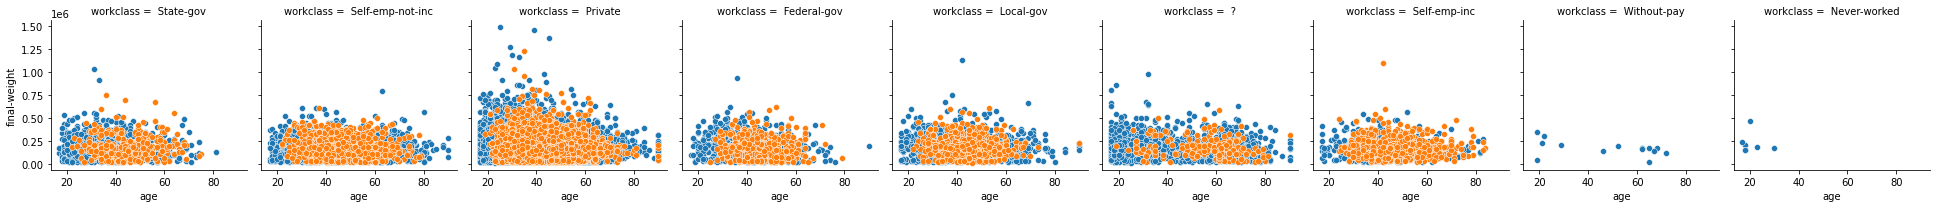

In [17]:
g = sns.FacetGrid(dataset, col = 'workclass', hue = 'income')
g.map(sns.scatterplot, 'age', 'final-weight');

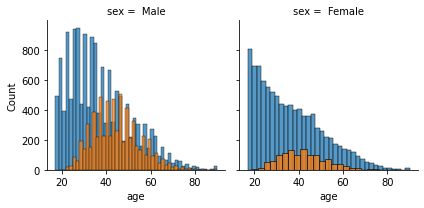

In [18]:
g = sns.FacetGrid(dataset, col = 'sex', hue = 'income')
g.map(sns.histplot, 'age');

In [19]:
dataset2.head()

,age,education-num,hour-per-week
0,39,13,40
1,50,13,13
2,38,9,40
3,53,7,40
4,28,13,40


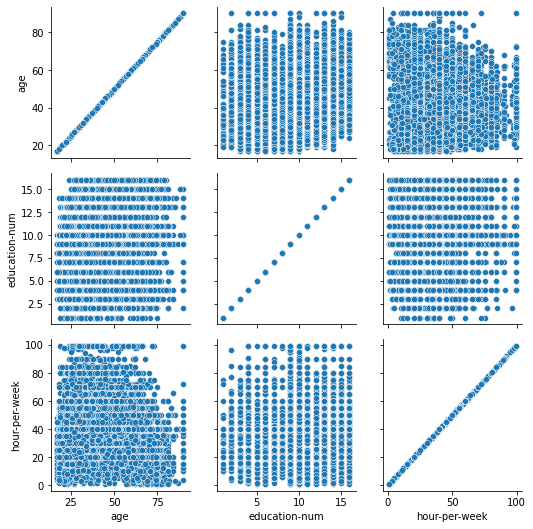

In [20]:
g = sns.PairGrid(dataset2)
g.map(sns.scatterplot)

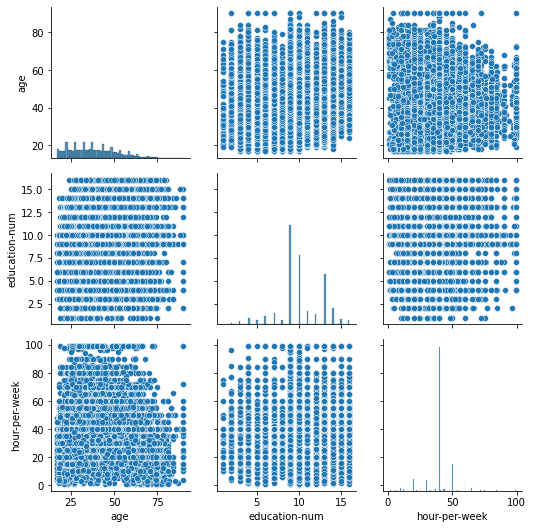

In [21]:
g = sns.PairGrid(dataset2)
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot);

In [22]:
dataset.head(3)

,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K


##Mapa

In [ ]:
!apt-get install libgeos-3.5.0
!apt-get install libgeos-dev
!python -m pip install basemap

In [26]:
from mpl_toolkits.basemap import Basemap

In [27]:
dataset = pd.read_csv('house_prices.csv')
dataset.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [28]:
dataset['lat'].describe()

count    21613.000000
mean        47.560053
std          0.138564
min         47.155900
25%         47.471000
50%         47.571800
75%         47.678000
max         47.777600
Name: lat, dtype: float64

In [29]:
dataset['long'].describe()

count    21613.000000
mean      -122.213896
std          0.140828
min       -122.519000
25%       -122.328000
50%       -122.230000
75%       -122.125000
max       -121.315000
Name: long, dtype: float64

In [39]:
lat1, lat2 = dataset['lat'].min(), dataset['lat'].max()
lon1, lon2 = dataset['long'].min(), dataset['long'].max()
lat1,lat2,lon1,lon2

(47.1559, 47.7776, -122.519, -121.315)

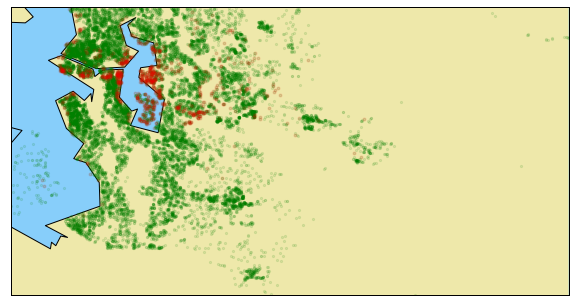

In [46]:
from pandas._libs.tslibs import Resolution
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
m = Basemap(projection ='cyl', resolution='i',
            llcrnrlat = lat1, urcrnrlat = lat2,
            llcrnrlon = lon1, urcrnrlon = lon2)
m.drawcoastlines()
m.fillcontinents(color ='palegoldenrod', lake_color ='lightskyblue')
m.drawmapboundary(fill_color = 'lightskyblue')
m.scatter(dataset['long'], dataset['lat'], s = 5, c='green', alpha = 0.1, zorder = 2)
m.scatter(dataset_caros['long'], dataset_caros['lat'], s = 10, c = 'red', alpha = 0.1, zorder=3 )

Fazendo uma busca no Google maps com a latitude media e a longitude media, concluimos que o mapa acima é da cidade de seattle nos estados unidos.

In [41]:
dataset = dataset.sort_values(by = 'price', ascending = False)
dataset.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7252,6762700020,20141013T000000,7700000.0,6,8.00,12050,27600,2.5,0,3,...,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800
3914,9808700762,20140611T000000,7062500.0,5,4.50,10040,37325,2.0,1,2,...,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449
9254,9208900037,20140919T000000,6885000.0,6,7.75,9890,31374,2.0,0,4,...,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730
4411,2470100110,20140804T000000,5570000.0,5,5.75,9200,35069,2.0,0,0,...,13,6200,3000,2001,0,98039,47.6289,-122.233,3560,24345
1448,8907500070,20150413T000000,5350000.0,5,5.00,8000,23985,2.0,0,4,...,12,6720,1280,2009,0,98004,47.6232,-122.220,4600,21750


In [42]:
dataset.tail()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
8274,3883800011,20141105T000000,82000.0,3,1.00,860,10426,1.0,0,0,...,6,860,0,1954,0,98146,47.4987,-122.341,1140,11250
16198,3028200080,20150324T000000,81000.0,2,1.00,730,9975,1.0,0,0,...,5,730,0,1943,0,98168,47.4808,-122.315,860,9000
465,8658300340,20140523T000000,80000.0,1,0.75,430,5050,1.0,0,0,...,4,430,0,1912,0,98014,47.6499,-121.909,1200,7500
15293,40000362,20140506T000000,78000.0,2,1.00,780,16344,1.0,0,0,...,5,780,0,1942,0,98168,47.4739,-122.280,1700,10387
1149,3421079032,20150217T000000,75000.0,1,0.00,670,43377,1.0,0,0,...,3,670,0,1966,0,98022,47.2638,-121.906,1160,42882


In [45]:
dataset_caros = dataset[0:1000]
dataset_caros

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7252,6762700020,20141013T000000,7700000.0,6,8.00,12050,27600,2.5,0,3,...,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800
3914,9808700762,20140611T000000,7062500.0,5,4.50,10040,37325,2.0,1,2,...,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449
9254,9208900037,20140919T000000,6885000.0,6,7.75,9890,31374,2.0,0,4,...,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730
4411,2470100110,20140804T000000,5570000.0,5,5.75,9200,35069,2.0,0,0,...,13,6200,3000,2001,0,98039,47.6289,-122.233,3560,24345
1448,8907500070,20150413T000000,5350000.0,5,5.00,8000,23985,2.0,0,4,...,12,6720,1280,2009,0,98004,47.6232,-122.220,4600,21750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7271,8965520190,20141030T000000,1200000.0,3,2.50,3420,16622,1.0,0,4,...,10,2410,1010,1991,0,98006,47.5638,-122.105,3460,14566
9925,3623500049,20150501T000000,1200000.0,4,2.25,2320,13114,2.0,0,0,...,8,2320,0,1967,0,98040,47.5762,-122.239,2740,15000
5886,9808590460,20150218T000000,1200000.0,4,2.25,2860,10702,2.0,0,0,...,10,2860,0,1982,0,98004,47.6451,-122.189,2890,10572
19613,7525950110,20140828T000000,1200000.0,4,3.25,3850,19842,2.0,0,3,...,11,3180,670,1989,0,98074,47.6239,-122.065,4320,19500


In [22]:
m.scatter(dataset_caros['long'], dataset_caros['lat'], s=10, c= 'red', alpha = 0.1, zorder=3 
m.scatter(dataset_baratos['long'], dataset_baratos['lat'], s=10, c='blue', alpha = 0.1, zorder = 4)
